# Performance Comparison of Logistic Regression, KNN, and Random Forest Classifiers Using Machine Learning Pipeline
(ML Pipeline assignment - 1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Confusion Matrix for Logistic Regression:
[[41  2]
 [ 1 70]]

Confusion Matrix for KNN:
[[40  3]
 [ 3 68]]

Confusion Matrix for Random Forest:
[[40  3]
 [ 1 70]]


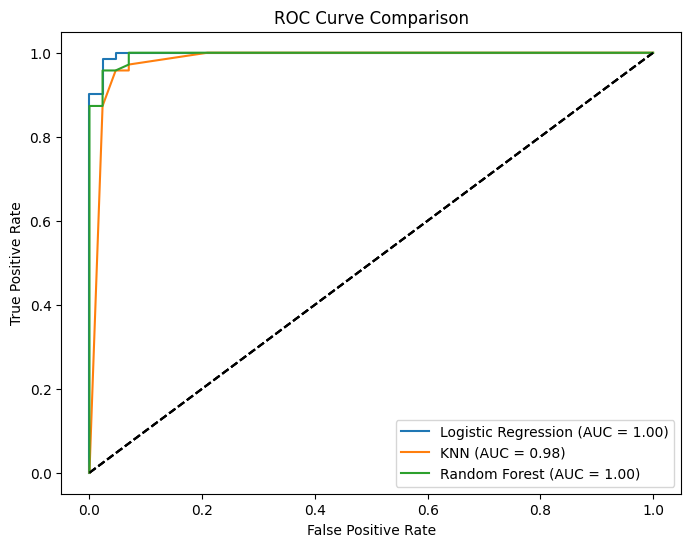

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021
1                  KNN  0.947368   0.957746  0.957746  0.957746
2        Random Forest  0.964912   0.958904  0.985915  0.972222


In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = []

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    # Confusion Matrix
    print(f"\nConfusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))

    plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Performance Table
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(df_results)

